# 1일차 Review : 같은 문제 다시 풀어보기

    학습은 10번으로!

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
x = iris.data
y = iris.target

In [4]:
x.shape, y.shape

((150, 4), (150,))

In [5]:
#####################
# 라이브러리 불러오기
#####################
import tensorflow as tf
from tensorflow import keras

In [6]:
#######################
# 어떤 전처리 작업 필요
# Hint : y.shape
#######################
# training set / test set 구분
from sklearn.model_selection import train_test_split

# y에 대한 One-Hot Encoding
from tensorflow.keras.utils import to_categorical

In [7]:
x_train, x_test, y_train, y_test =\
        train_test_split(x,y, random_state=2022, test_size=0.2)

In [8]:
x_train.shape, y_train.shape

((120, 4), (120,))

In [9]:
y_len = len(set(y_train))

In [10]:
y_train = to_categorical(y_train, y_len)
y_test = to_categorical(y_test, y_len)

In [27]:
x_train.shape, y_train.shape

((120, 4), (120, 3))

In [11]:
########
# 모델링 : Sequential API style
########

# 1번 청소 : 이미 만들어진 모델이 있다면 그 모델을 없애줘
keras.backend.clear_session()

# 2번 모델 선언
model_1 = keras.models.Sequential()

# 3번 모델 블록 조립
model_1.add( keras.layers.Input(shape=(4,)) )
model_1.add( keras.layers.Dense(3, activation='softmax') )

## 오리지널 Sequential API
# model.add( keras.layers.Dense(1, input_shape=(1,)) )

# 4번 컴파일 
model_1.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], optimizer='adam')
 
# model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.activations import softmax

In [13]:
###########
# 모델링 : Functional.API
###########

# 1번. 세션 클리어
clear_session()

# 2번. 레이어 사슬처럼 엮기
il = Input(shape=(4,), name='input_layer')
ol = Dense(3, softmax, name='softmax_layer')(il)

#3번. 모델의 시작과 끝 지정
model_2 = Model(il, ol)

#4번. 컴파일
model_2.compile(loss=categorical_crossentropy, metrics=['accuracy'], optimizer='adam')

#양념
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 4)]               0         
                                                                 
 softmax_layer (Dense)       (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [14]:
###########
# 모델 학습
###########
model_2.fit(x_train, y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 2s 302ms/step - loss: 6.3833 - accuracy: 0.3333 - val_loss: 7.2716 - val_accuracy: 0.2083
Epoch 2/10
3/3 [==============================] - 0s 24ms/step - loss: 6.3301 - accuracy: 0.3333 - val_loss: 7.2100 - val_accuracy: 0.2083
Epoch 3/10
3/3 [==============================] - 0s 22ms/step - loss: 6.2804 - accuracy: 0.3333 - val_loss: 7.1481 - val_accuracy: 0.2083
Epoch 4/10
3/3 [==============================] - 0s 22ms/step - loss: 6.2262 - accuracy: 0.3333 - val_loss: 7.0866 - val_accuracy: 0.2083
Epoch 5/10
3/3 [==============================] - 0s 22ms/step - loss: 6.1753 - accuracy: 0.3333 - val_loss: 7.0248 - val_accuracy: 0.2083
Epoch 6/10
3/3 [==============================] - 0s 29ms/step - loss: 6.1207 - accuracy: 0.3333 - val_loss: 6.9635 - val_accuracy: 0.2083
Epoch 7/10
3/3 [==============================] - 0s 25ms/step - loss: 6.0697 - accuracy: 0.3333 - val_loss: 6.9018 - val_accuracy: 0.2083
Epoch 8/10
3/3 [==========

In [15]:
###########
# 모델 예측
###########
y_pred_1 = model_1.predict(x_test)
y_pred_1[:5]

array([[7.8147709e-01, 3.6567631e-08, 2.1852294e-01],
       [7.6909667e-01, 3.2317404e-09, 2.3090334e-01],
       [5.8730787e-01, 1.8966042e-05, 4.1267312e-01],
       [7.7340043e-01, 4.3136307e-08, 2.2659956e-01],
       [6.1184853e-01, 9.3925000e-06, 3.8814205e-01]], dtype=float32)

In [16]:
y_pred_1[:5].argmax(axis=1).reshape(-1,1)

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

# 히든 레이어 추가하여 모델링! (Functional API)

    히든 레이어 2개를 추가하여 다시 모델링!
    히든 레이어 노드 수 : 32
    히든 레이어 activation = 'relu'

In [17]:
x_train.shape, y_train.shape

((120, 4), (120, 3))

In [18]:
########
# 모델링
########
# 1번. 세션 클리어
clear_session()

# 2번. 레이어 사슬처럼 엮기
il = Input(shape=(4,))
h1 = Dense(32, activation='relu')(il)
h1 = Dense(32, activation='relu')(h1)
ol = Dense(3, activation=softmax)(h1)

# 3번. 모델의 시작과 끝 지정
model = Model(il, ol)

# 4번. 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'], optimizer='adam')

# 양념
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


###### - Param(160)의 의미: (4+1) * 32 / Param(1056)의 의미: (32+1) * 32
#### - Feature Representation: 기존의 연결된 것으로부터 새로운 특징을 추출하는것 (Feature Learning, Representation Learning이라고도 함)
- 첫번째 hidden layer의 노드 갯수(32)의 의미: input layer에서 새로운 feature를 32개 뽑아낸다 즉, new feature
- 두번째 hidden layer의 노드 갯수(32)의 의미: 첫번째 hidden layer에서 새로운 feature를 32개 뽑아낸다. 즉, low level에서 32개의 새로운 feature를 뽑아 내는 것

In [19]:
## Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [20]:


es = EarlyStopping(monitor='val_loss',         # 무엇을 관찰할래? (loss는 낮을 수록 좋음)
                   min_delta=0,                # 0이면, 최소한 나빠지지만 않으면 괜찮아
                   patience=3,                 # monitor가 개선되지 않는 거를 몇 번 참을래?
                   verbose=1,                  # Early Stopping 된 것을 보여줍니다
                   restore_best_weights=True) # 중요! 최적의 학습 가중치를 모델에 전달합니다 

In [21]:
###########
# 모델 학습
###########

hist = model.fit(x_train, y_train, epochs=500, verbose=1, validation_split=0.2, callbacks=[es] )

Epoch 1/500
3/3 [==============================] - 2s 234ms/step - loss: 1.5954 - accuracy: 0.3229 - val_loss: 1.3755 - val_accuracy: 0.4167
Epoch 2/500
3/3 [==============================] - 0s 36ms/step - loss: 1.4376 - accuracy: 0.2917 - val_loss: 1.2889 - val_accuracy: 0.1250
Epoch 3/500
3/3 [==============================] - 0s 36ms/step - loss: 1.3157 - accuracy: 0.0312 - val_loss: 1.2395 - val_accuracy: 0.0000e+00
Epoch 4/500
3/3 [==============================] - 0s 37ms/step - loss: 1.2425 - accuracy: 0.0729 - val_loss: 1.2200 - val_accuracy: 0.3333
Epoch 5/500
3/3 [==============================] - 0s 54ms/step - loss: 1.2084 - accuracy: 0.3229 - val_loss: 1.2153 - val_accuracy: 0.3750
Epoch 6/500
3/3 [==============================] - 0s 46ms/step - loss: 1.1801 - accuracy: 0.3542 - val_loss: 1.2087 - val_accuracy: 0.4167
Epoch 7/500
3/3 [==============================] - 0s 24ms/step - loss: 1.1450 - accuracy: 0.5208 - val_loss: 1.2074 - val_accuracy: 0.4583
Epoch 8/500
3/3

3/3 [==============================] - 0s 57ms/step - loss: 0.3574 - accuracy: 0.9583 - val_loss: 0.3328 - val_accuracy: 1.0000
Epoch 60/500
3/3 [==============================] - 0s 24ms/step - loss: 0.3505 - accuracy: 0.9583 - val_loss: 0.3285 - val_accuracy: 1.0000
Epoch 61/500
3/3 [==============================] - 0s 22ms/step - loss: 0.3449 - accuracy: 0.9583 - val_loss: 0.3252 - val_accuracy: 1.0000
Epoch 62/500
3/3 [==============================] - 0s 21ms/step - loss: 0.3401 - accuracy: 0.9583 - val_loss: 0.3215 - val_accuracy: 1.0000
Epoch 63/500
3/3 [==============================] - 0s 22ms/step - loss: 0.3355 - accuracy: 0.9583 - val_loss: 0.3156 - val_accuracy: 1.0000
Epoch 64/500
3/3 [==============================] - 0s 23ms/step - loss: 0.3279 - accuracy: 0.9583 - val_loss: 0.3065 - val_accuracy: 1.0000
Epoch 65/500
3/3 [==============================] - 0s 23ms/step - loss: 0.3247 - accuracy: 0.9688 - val_loss: 0.3003 - val_accuracy: 0.9583
Epoch 66/500
3/3 [========

3/3 [==============================] - 0s 41ms/step - loss: 0.1555 - accuracy: 0.9688 - val_loss: 0.1419 - val_accuracy: 1.0000
Epoch 118/500
3/3 [==============================] - 0s 38ms/step - loss: 0.1515 - accuracy: 0.9688 - val_loss: 0.1400 - val_accuracy: 1.0000
Epoch 119/500
3/3 [==============================] - 0s 45ms/step - loss: 0.1499 - accuracy: 0.9792 - val_loss: 0.1386 - val_accuracy: 1.0000
Epoch 120/500
3/3 [==============================] - 0s 42ms/step - loss: 0.1493 - accuracy: 0.9792 - val_loss: 0.1363 - val_accuracy: 1.0000
Epoch 121/500
3/3 [==============================] - 0s 36ms/step - loss: 0.1463 - accuracy: 0.9792 - val_loss: 0.1347 - val_accuracy: 1.0000
Epoch 122/500
3/3 [==============================] - 0s 18ms/step - loss: 0.1453 - accuracy: 0.9688 - val_loss: 0.1330 - val_accuracy: 1.0000
Epoch 123/500
3/3 [==============================] - 0s 20ms/step - loss: 0.1429 - accuracy: 0.9688 - val_loss: 0.1313 - val_accuracy: 1.0000
Epoch 124/500
3/3 [=

Epoch 175/500
3/3 [==============================] - 0s 23ms/step - loss: 0.0920 - accuracy: 0.9792 - val_loss: 0.0818 - val_accuracy: 1.0000
Epoch 176/500
3/3 [==============================] - 0s 23ms/step - loss: 0.0915 - accuracy: 0.9792 - val_loss: 0.0814 - val_accuracy: 1.0000
Epoch 177/500
3/3 [==============================] - 0s 24ms/step - loss: 0.0905 - accuracy: 0.9792 - val_loss: 0.0811 - val_accuracy: 1.0000
Epoch 178/500
3/3 [==============================] - 0s 24ms/step - loss: 0.0899 - accuracy: 0.9792 - val_loss: 0.0810 - val_accuracy: 1.0000
Epoch 179/500
3/3 [==============================] - 0s 26ms/step - loss: 0.0898 - accuracy: 0.9792 - val_loss: 0.0810 - val_accuracy: 1.0000
Epoch 180/500
3/3 [==============================] - 0s 35ms/step - loss: 0.0902 - accuracy: 0.9792 - val_loss: 0.0794 - val_accuracy: 1.0000
Epoch 181/500
3/3 [==============================] - 0s 34ms/step - loss: 0.0895 - accuracy: 0.9792 - val_loss: 0.0789 - val_accuracy: 1.0000
Epoch 

In [22]:
###########
# 모델 예측
###########
y_pred = model.predict(x_test)
y_pred[:5]

array([[1.24520075e-05, 8.91203154e-03, 9.91075516e-01],
       [2.91071387e-06, 8.43937136e-03, 9.91557717e-01],
       [9.82422590e-01, 1.75747126e-02, 2.69471047e-06],
       [1.45122511e-04, 1.01673722e-01, 8.98181200e-01],
       [9.95286703e-01, 4.71293833e-03, 3.19649644e-07]], dtype=float32)

In [23]:
y_pred[:5].argmax(axis=1).reshape(-1,1)

array([[2],
       [2],
       [0],
       [2],
       [0]], dtype=int64)

In [24]:
y_test[:5].argmax(axis=1).reshape(-1,1)

array([[2],
       [2],
       [0],
       [2],
       [0]], dtype=int64)

In [25]:
import matplotlib.pyplot as plt

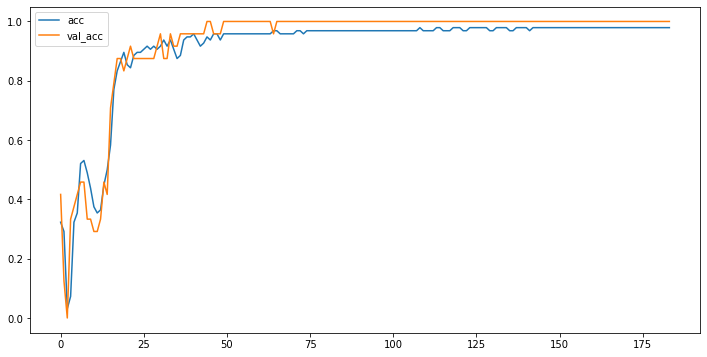

In [26]:
# hist.history: loss와 accuracy가 딕셔너리 형태로 나옴
plt.figure(figsize=(12,6))

plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

# x축은 epochs, y축은 accuracy
plt.show() 